# Python

# Total Marks: 100 
Each question 10 marks

Question 1: - 
Write a program that takes a string as input, and counts the frequency of each word in the string, there might be repeated characters in the string. Your task is to find the highest frequency and returns the length of the highest-frequency word. 
Note - You have to write at least 2 additional test cases in which your program will run successfully and provide an explanation for the same. 
Example input - string = “write write write all the number from from from 1 to 100” 
Example output - 5 
Explanation - From the given string we can note that the most frequent words are “write” and “from” and the maximum value of both the values is “write” and its corresponding length is 5 

In [43]:
def highest_frequency(string):

    words = string.split()
    
    word_frequency = {}

    for i in words:
        if i in word_frequency:
            word_frequency[i] += 1
        else:
            word_frequency[i] = 1

    max_frequency = max(word_frequency.values())

    for i,j in word_frequency.items():
        if j == max_frequency:
            return len(i)  
        
highest_frequency("write write write all the number from from from 1 to 100")

5

Question 2: - 
Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if he can remove just one character at the index in the string, and the remaining characters will occur the same number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO . 
Note - You have to write at least 2 additional test cases in which your program will run successfully and provide an explanation for the same. 
Example input 1 - s = “abc”. This is a valid string because frequencies are { “a”: 1, “b”: 1, “c”: 1 } Example output 1- YES 
Example input 2 - s “abcc”. This string is not valid as we can remove only 1 occurrence of “c”. That leaves character frequencies of { “a”: 1, “b”: 1 , “c”: 2 } 
Example output 2 - NO 

In [44]:
from collections import Counter
def valid_string(s):
    count_frequency = Counter(s)

    frequency = set(count_frequency.values())
  
    if len(frequency) == 1:
        return "Yes"
    
    else:
        return "No"
print(valid_string("aabbcc"))
print(valid_string("aabbcdd"))

Yes
No


Question 3: - 
Write a program, which would download the data from the provided link, and then read the data and convert that into properly structured data and return it in Excel format. 
Note - Write comments wherever necessary explaining the code written.
Link - https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json 
Data Attributes - id: Identification Number - int num: Number of the 
● Pokémon in the official Pokédex - int name: Pokémon name - 
● string img: URL to an image of this Pokémon - string type: 
● Pokémon type -string height: Pokémon height - float 
● weight: Pokémon weight - float candy: type of candy used to evolve Pokémon or given 
● when transferred - string candy_count: the amount of candies required to evolve - int 
● egg: Number of kilometers to travel to hatch the egg - float spawn_chance: 
● Percentage of spawn chance (NEW) - float avg_spawns: Number of this 
pokemon on 10.000 spawns (NEW) - int 
● spawn_time: Spawns most active at the time on this field. Spawn times are the same for all time zones and are expressed in local time. (NEW) - “minutes: seconds” multipliers: Multiplier of Combat Power (CP) for calculating the CP after evolution See below - list of int weakness: Types of 
● Pokémon this Pokémon is weak to - list of strings next_evolution: Number and Name of successive evolutions of Pokémon - list of dict prev_evolution: Number and Name of previous evolutions of Pokémon - - list of dict 

In [46]:
import requests
import pandas as pd

def download_pokedex_data(url):
    response = requests.get(url)
    data = response.json()
    return data

def convert_to_dataframe(data):
    records = []
    for pokemon in data["pokemon"]:
        record = {
            "ID": pokemon["id"],
            "Number": pokemon["num"],
            "Name": pokemon["name"],
            "Image URL": pokemon["img"],
            "Type": ", ".join(pokemon["type"]),
            "Height": pokemon["height"],
            "Weight": pokemon["weight"],
            "Candy": pokemon.get("candy", ""),
            "Candy Count": pokemon.get("candy_count", ""),
            "Egg": pokemon.get("egg", ""),
            "Spawn Chance": pokemon.get("spawn_chance", ""),
            "Average Spawns": pokemon.get("avg_spawns", ""),
            "Spawn Time": pokemon.get("spawn_time", ""),
            "Weaknesses": ", ".join(pokemon.get("weaknesses", [])),
            "Next Evolution": ", ".join([evo["name"] for evo in pokemon.get("next_evolution", [])]),
            "Previous Evolution": ", ".join([evo["name"] for evo in pokemon.get("prev_evolution", [])])
        }
        records.append(record)

    
    df = pd.DataFrame(records)
    return df

def export_to_excel(dataframe, output_file):
    dataframe.to_excel(output_file, index=False)


url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
pokedex_data = download_pokedex_data(url)


df_pokedex = convert_to_dataframe(pokedex_data)


output_file = "pokedex.xlsx"
export_to_excel(df_pokedex, output_file)
df_pokedex.to_excel('saved_file.xlsx')
#print(df_pokedex)

Question 4 - 
Write a program to download the data from the link given below and then read the data and convert the into the proper structure and return it as a CSV file. 
Link - https://data.nasa.gov/resource/y77d-th95.json 
Note - Write code comments wherever needed for code understanding.

In [47]:
import requests
import pandas as pd

def download_meteorite_data(url):
    response = requests.get(url) 
    data = response.json()  
    return data

def convert_to_dataframe(data):
    records = []
    for meteorite in data:
        record = {
            "Name of Earth Meteorite": meteorite.get("name", ""),
            "ID of Earth Meteorite": meteorite.get("id", ""),
            "Name Type": meteorite.get("nametype", ""),
            "Recclass": meteorite.get("recclass", ""),
            "Mass (g)": meteorite.get("mass (g)", ""),
            "Year": meteorite.get("year", ""),
            "Latitude": meteorite.get("reclat", ""),
            "Longitude": meteorite.get("reclong", ""),
            "Coordinates": meteorite.get("geolocation", {}).get("coordinates", [])
        }
        records.append(record)

    df = pd.DataFrame(records)
    return df

def export_to_csv(dataframe, output_file):
    dataframe.to_csv(output_file, index=False)

url = "https://data.nasa.gov/resource/y77d-th95.json"
meteorite_data = download_meteorite_data(url)

df_meteorite = convert_to_dataframe(meteorite_data)

output_file = "meteorite_data.csv"
export_to_csv(df_meteorite, output_file)
#print(df_meteorite)

Question 5 - 
Write a program to download the data from the given API link and then extract the following data with proper formatting 
Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes 
Note - Write proper code comments wherever needed for the code understanding
Sample Data - 

Excepted Output Data Attributes - 
● id - int url - string 
● name - string season 
● - int number - int 
● type - string airdate - 
● date format airtime - 
● 12-hour time format 
● runtime - float 
● average rating - float 
● summary - string 
● without html tags 
● medium image link - string 
● Original image link - string

In [48]:
import requests

def download_and_extract_data(api_link):
    response = requests.get(api_link)
    
    if response.status_code == 200:
        data = response.json() 
        
        # Extract the show information
        show_id = data['id']
        show_name = data['name']
        
        episodes = data['_embedded']['episodes']
        extracted_data = []
        
        for episode in episodes:
            episode_id = episode['id']
            episode_url = episode['url']
            episode_season = episode['season']
            episode_number = episode['number']
            episode_type = episode['type']
            episode_airdate = episode['airdate']
            episode_airtime = episode['airtime']
            episode_runtime = episode['runtime']
            episode_rating = episode['rating']['average']
            episode_summary = episode['summary']
            episode_image_medium = episode['image']['medium']
            episode_image_original = episode['image']['original']
            
            extracted_data.append({
                'id': episode_id,
                'url': episode_url,
                'name': show_name,
                'season': episode_season,
                'number': episode_number,
                'type': episode_type,
                'airdate': episode_airdate,
                'airtime': episode_airtime,
                'runtime': episode_runtime,
                'average rating': episode_rating,
                'summary': episode_summary.strip('<p>').strip('</p>'),
                'medium image link': episode_image_medium,
                'original image link': episode_image_original
            })
        
        return extracted_data
    
    else:
        print('Error:', response.status_code)

api_link = 'http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes'
extracted_data = download_and_extract_data(api_link)

for episode in extracted_data:
    print('Episode ID:', episode['id'])
    print('Episode URL:', episode['url'])
    print('Show Name:', episode['name'])
    print('Season:', episode['season'])
    print('Number:', episode['number'])
    print('Type:', episode['type'])
    print('Airdate:', episode['airdate'])
    print('Airtime:', episode['airtime'])
    print('Runtime:', episode['runtime'])
    print('Average Rating:', episode['average rating'])
    print('Summary:', episode['summary'])
    print('Medium Image Link:', episode['medium image link'])
    print('Original Image Link:', episode['original image link'])
    print('---')

Episode ID: 869671
Episode URL: https://www.tvmaze.com/episodes/869671/westworld-1x01-the-original
Show Name: Westworld
Season: 1
Number: 1
Type: regular
Airdate: 2016-10-02
Airtime: 21:00
Runtime: 68
Average Rating: 8
Summary: A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.
Medium Image Link: https://static.tvmaze.com/uploads/images/medium_landscape/78/195475.jpg
Original Image Link: https://static.tvmaze.com/uploads/images/original_untouched/78/195475.jpg
---
Episode ID: 911201
Episode URL: https://www.tvmaze.com/episodes/911201/westworld-1x02-chestnut
Show Name: Westworld
Season: 1
Number: 2
Type: regular
Airdate: 2016-10-09
Airtime: 21:00
Runtime: 60
Average Rating: 7.7
Summary: Bernard suspects that someone is sa

Question 6 -
Using the data from Question 3, write code to analyze the data and answer the following questions
Note
1. Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all Pokemons whose spawn rate is less than 5%

● Get all Pokemons that have less than 4 weaknesses

● Get all Pokemons that have no multipliers at all

● Get all Pokemons that do not have more than 2 evolutions

● Get all Pokemons whose spawn time is less than 300 seconds. Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.

● Get all Pokemon who have more than two types of capabilities

In [49]:
['id','num','name','img','type','height','weight','candy','candy_count','egg','spawn_chance','avg_spawns','spawn_time','multipliers',
 'weaknesses','prev_evolution']
from urllib.request import urlopen
import json
import pandas as pd

url = " https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json" 

response = urlopen(url)

data_json = json.loads(response.read())
data_json['pokemon'][2]

data_list = []
for i in data_json['pokemon']:
    l = []
    l.append(i['id'])
    l.append(i['num'])
    l.append(i['name'])
    l.append(i['img'])
    l.append(i['type'])
    l.append(i['height'])
    l.append(i['weight'])
    l.append(i['candy'])
    if 'candy_count' in list(i.keys()):
        l.append(i['candy_count'])
    else:
        l.append(None)
    l.append(i['egg'])
    l.append(i['spawn_chance'])
    l.append(i['avg_spawns'])
    l.append(i['spawn_time'])
    l.append(i['multipliers'])
    l.append(i['weaknesses'])
    if 'prev_evolution' in list(i.keys()):
        l.append(i['prev_evolution'])
    else:
        l.append(None)
    if 'next_evolution' in list(i.keys()):
        l.append(i['next_evolution'])
    else:
         l.append(None)
    data_list.append(l)
import pandas as pd
df = pd.DataFrame(data_list)
df.columns = ['id','num','name','img','type','height','weight','candy','candy_count','egg','spawn_chance','avg_spawns','spawn_time','multipliers',
 'weaknesses','prev_evolution','next_evolution']
df
l = []
for i in data_json['pokemon']:
    if i['avg_spawns'] < 5:
        l.append(i['name'])
print("List of Pokemon Having Spawn rate less than 5:")
print(l)
df[df['avg_spawns']<5]
l = []
for i in data_json['pokemon']:
    if len(i['weaknesses']) < 4:
        l.append(i['name'])
print("List of Pokemon Having less than 4 weaknesses:")
print(l)
l = []
for x,i in zip(df['name'],df['weaknesses']):
    if len(i)<4:
        l.append(x)
print("List of Pokemon Having less than 4 weaknesses:")
print(l)     
l = []
for i in data_json['pokemon']:
    if 'prev_evolution' not in list(i.keys()):
        l.append(i['name'])
        
    if 'next_evolution' in list(i.keys()):
        l.append(i['name'])
print("Pokemon having less than 2 evolutions:")
print(set(l))
l = []
for i in data_json['pokemon']:
    if i['spawn_time'] == 'N/A':
        continue
    stime = i['spawn_time']
    stime = stime.split(":")
    total_seconds = int(stime[0])*60 + int(stime[1])
    if total_seconds < 300:
        l.append(i['name'])
print("Pokemon having spawn time of less than 300 seconds:")
print(l)
l = []
for i in data_json['pokemon']:
    if len(i['type']) >= 2:
        l.append(i['name'])
print("List of Pokemon Having 2 and more capabilities:")
print(l)

List of Pokemon Having Spawn rate less than 5:
['Ivysaur', 'Venusaur', 'Charmeleon', 'Charizard', 'Wartortle', 'Blastoise', 'Butterfree', 'Pidgey', 'Rattata', 'Raichu', 'Sandslash', 'Nidoqueen', 'Nidoking', 'Clefable', 'Ninetales', 'Wigglytuff', 'Vileplume', 'Dugtrio', 'Persian', 'Primeape', 'Arcanine', 'Poliwrath', 'Kadabra', 'Alakazam', 'Machoke', 'Machamp', 'Victreebel', 'Golem', 'Rapidash', 'Slowbro', 'Magneton', "Farfetch'd", 'Dewgong', 'Muk', 'Cloyster', 'Gengar', 'Electrode', 'Exeggutor', 'Marowak', 'Hitmonlee', 'Hitmonchan', 'Lickitung', 'Weezing', 'Rhydon', 'Chansey', 'Kangaskhan', 'Seadra', 'Starmie', 'Mr. Mime', 'Gyarados', 'Lapras', 'Ditto', 'Vaporeon', 'Jolteon', 'Flareon', 'Porygon', 'Omastar', 'Kabutops', 'Aerodactyl', 'Snorlax', 'Articuno', 'Zapdos', 'Moltres', 'Dragonair', 'Dragonite', 'Mewtwo', 'Mew']
List of Pokemon Having less than 4 weaknesses:
['Charmander', 'Charmeleon', 'Charizard', 'Squirtle', 'Wartortle', 'Blastoise', 'Caterpie', 'Metapod', 'Pidgey', 'Pidgeott

Question 7 -
Using the data from Question 4, write code to analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all the Earth meteorites that fell before the year 2000
● Get all the earth meteorites co-ordinates who fell before the year 1970
● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

In [50]:
import requests
import json
import matplotlib.pyplot as plt

In [51]:
url = "https://data.nasa.gov/resource/y77d-th95.json"
response = requests.get(url)
data = json.loads(response.text)

In [52]:
earth_meteorites_before_2000 = []
earth_meteorites_before_1970 = []
mass_more_than_10000kg = []

In [53]:
for meteorite in data:
    if "year" in meteorite:
        year_fell = meteorite["year"].split("-")[0]
    else:
        year_fell = ""  
        
    if "mass (g)" in meteorite:
        mass = float(meteorite["mass (g)"]) / 1000  
    else:
        mass = 0.0  
    
    if year_fell and int(year_fell) < 2000 and meteorite.get("reclat") and meteorite.get("reclong"):
        earth_meteorites_before_2000.append(meteorite)
    
    if year_fell and int(year_fell) < 1970 and meteorite.get("reclat") and meteorite.get("reclong"):
        earth_meteorites_before_1970.append(meteorite)
    
    if mass > 10000:
        mass_more_than_10000kg.append(meteorite)

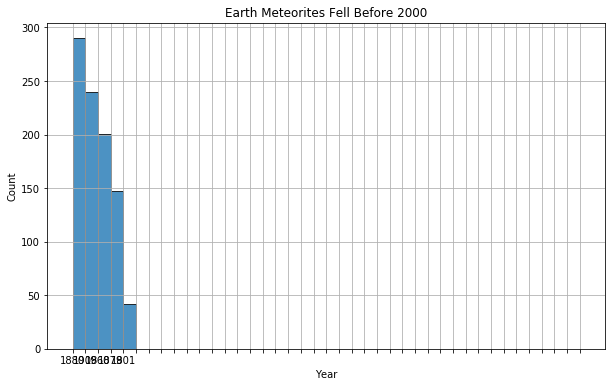

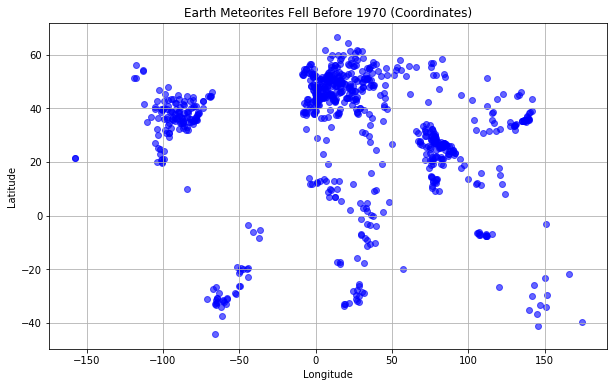

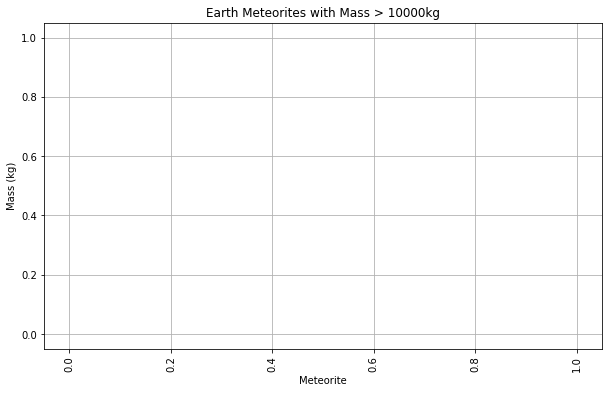

In [54]:
# Plot 1: Earth meteorites that fell before the year 2000
years = [meteorite["year"].split("-")[0] for meteorite in earth_meteorites_before_2000]
count = len(earth_meteorites_before_2000)

plt.figure(figsize=(10, 6))
plt.hist(years, bins=range(0, 2050, 50), edgecolor='black', alpha=0.8)
plt.title("Earth Meteorites Fell Before 2000")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(range(0, 2050, 50))
plt.grid(True)
plt.show()

# Plot 2: Earth meteorites coordinates that fell before the year 1970
latitude = [float(meteorite["reclat"]) for meteorite in earth_meteorites_before_1970]
longitude = [float(meteorite["reclong"]) for meteorite in earth_meteorites_before_1970]

plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, color='blue', alpha=0.6)
plt.title("Earth Meteorites Fell Before 1970 (Coordinates)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

# Plot 3: Earth meteorites with mass more than 10000kg
names = [meteorite["name"] for meteorite in mass_more_than_10000kg]
masses = [float(meteorite["mass (g)"]) / 1000 for meteorite in mass_more_than_10000kg]

plt.figure(figsize=(10, 6))
plt.bar(names, masses)
plt.title("Earth Meteorites with Mass > 10000kg")
plt.xlabel("Meteorite")
plt.ylabel("Mass (kg)")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
● Get all the episode names, whose average rating is more than 8 for every season
● Get all the episode names that aired before May 2019
● Get the episode name from each season with the highest and lowest rating
● Get the summary for the most popular ( ratings ) episode in every season

Overall Rating for Season 1 is: 8.09
Overall Rating for Season 2 is: 8.0
Overall Rating for Season 3 is: 7.775
Overall Rating for Season 4 is: 7.5375000000000005


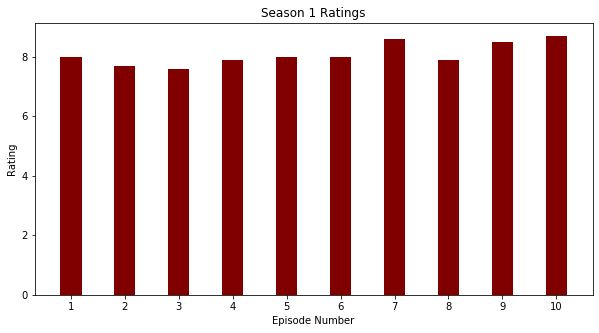

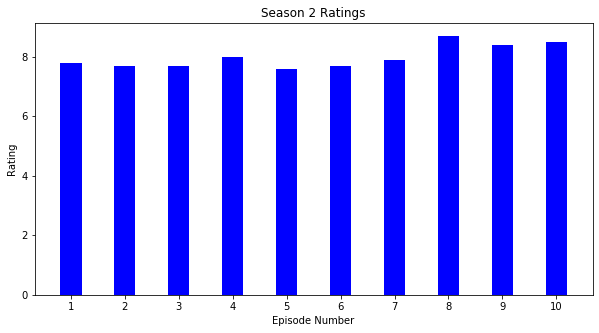

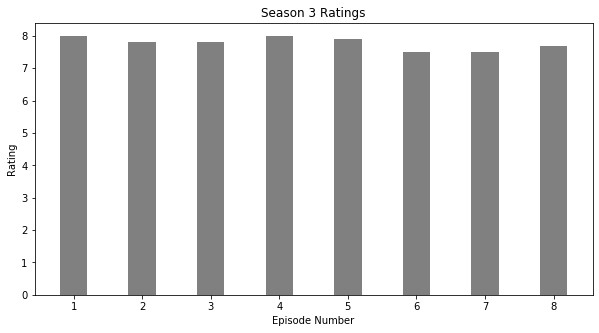

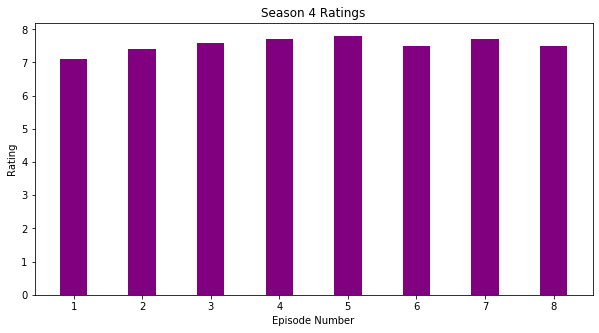

List of episodes having rating greater than 8 in Season 1:
["Trompe L'Oeil", 'The Well-Tempered Clavier', 'The Bicameral Mind']

List of episodes having rating greater than 8 in Season 2:
['Kiksuya', 'Vanishing Point', 'The Passenger']

List of episodes having rating greater than 8 in Season 3:
[]

List of episodes having rating greater than 8 in Season 4:
[]
List of All Episodes aired before 2019:
['The Original', 'Chestnut', 'The Stray', 'Dissonance Theory', 'Contrapasso', 'The Adversary', "Trompe L'Oeil", 'Trace Decay', 'The Well-Tempered Clavier', 'The Bicameral Mind', 'Journey Into Night', 'Reunion', 'Virtù e Fortuna', 'The Riddle of the Sphinx', 'Akane No Mai', 'Phase Space', 'Les Écorchés', 'Kiksuya', 'Vanishing Point', 'The Passenger']
Season 1 Min Rating Episode: The Stray
Season 1 Max Rating Episode: The Bicameral Mind
Season 2 Min Rating Episode: Akane No Mai
Season 2 Max Rating Episode: Kiksuya
Season 3 Max Rating Episode: Parce Domine
Season 3 Max Rating Episode: The Mothe

In [55]:
#Ans
from urllib.request import urlopen
import json
import pandas as pd

# store the URL in url as 
# parameter for urlopen
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes" 
# store the response of URL
response = urlopen(url)
  
# storing the JSON response 
# from url in data
data_json = json.loads(response.read())
json_formatted_str = json.dumps(data_json, indent=0)

r1, r2, r3, r4 = [], [], [], [] 

for i in data_json['_embedded']['episodes']:
    if i['season'] == 1:
        r1.append(i['rating']['average'])
    elif i['season'] == 2:
        r2.append(i['rating']['average'])
    elif i['season'] == 3:
        r3.append(i['rating']['average']) 
    else:
        r4.append(i['rating']['average'])
sum1 = 0
for i in r1:
    sum1 += i
print("Overall Rating for Season 1 is:",sum1/len(r1))

sum2 = 0
for x in r2:
    sum2 += x
print("Overall Rating for Season 2 is:",sum2/len(r2))
    
sum3 = 0
for z in r3:
    sum3 += z
print("Overall Rating for Season 3 is:",sum3/len(r3))

sum4 = 0
for y in r4:
    sum4 += y
print("Overall Rating for Season 4 is:",sum4/len(r4))

import numpy as np
import matplotlib.pyplot as plt
x = []
for i in range(1,len(r1)+1):
    x.append(str(i))   
y = r1

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y, color ='maroon',width = 0.4)
 
plt.xlabel("Episode Number")
plt.ylabel("Rating")
plt.title("Season 1 Ratings")
plt.show()

x = []
for i in range(1,len(r2)+1):
    x.append(str(i))   
y = r2

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y, color ='blue',width = 0.4)
 
plt.xlabel("Episode Number")
plt.ylabel("Rating")
plt.title("Season 2 Ratings")
plt.show()

x = []
for i in range(1,len(r3)+1):
    x.append(str(i))   
y = r3

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y, color ='grey',width = 0.4)
 
plt.xlabel("Episode Number")
plt.ylabel("Rating")
plt.title("Season 3 Ratings")
plt.show()

x = []
for i in range(1,len(r4)+1):
    x.append(str(i))   
y = r4

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y, color ='purple',width = 0.4)
 
plt.xlabel("Episode Number")
plt.ylabel("Rating")
plt.title("Season 4 Ratings")
plt.show()

e1, e2, e3, e4 = [], [], [], []


for i in data_json['_embedded']['episodes']:
    if i['rating']['average'] > 8 and i['season'] == 1:
        e1.append(i['name'])
    elif i['rating']['average'] > 8 and i['season'] == 2:
        e2.append(i['name'])
    elif i['rating']['average'] > 8 and i['season'] == 3:
        e3.append(i['name'])
    elif i['rating']['average'] > 8 and i['season'] == 4:
        e4.append(i['name'])
    else:
        continue
print("List of episodes having rating greater than 8 in Season 1:")
print(e1)

print()
print("List of episodes having rating greater than 8 in Season 2:")
print(e2)

print()
print("List of episodes having rating greater than 8 in Season 3:")
print(e3)

print()
print("List of episodes having rating greater than 8 in Season 4:")
print(e4)

e_2019 = []
for i in data_json['_embedded']['episodes']:
    stamp = i['airdate'].split('-')
    if int(stamp[0]) < 2019:
        e_2019.append(i['name'])
print("List of All Episodes aired before 2019:")
print(e_2019)

max1 , min1 = max(r1), min(r1)
max2 , min2 = max(r2), min(r2)
max3 , min3 = max(r3), min(r3)
max4 , min4 = max(r4), min(r4)

for i in data_json['_embedded']['episodes']:
    if i['season'] == 1:
        if max1 == i['rating']['average']:
            print("Season 1 Max Rating Episode:",i['name'])        
        if min1 == i['rating']['average']:
            print("Season 1 Min Rating Episode:",i['name'])   
    elif i['season'] == 2:
        if max2 == i['rating']['average']:
            print("Season 2 Max Rating Episode:",i['name'])        
        if min2 == i['rating']['average']:
            print("Season 2 Min Rating Episode:",i['name']) 
    elif i['season'] == 3:
        if max3 == i['rating']['average']:
            print("Season 3 Max Rating Episode:",i['name'])        
        if min3 == i['rating']['average']:
            print("Season 3 Min Rating Episode:",i['name']) 
    else:
        if max4 == i['rating']['average']:
            print("Season 4 Max Rating Episode:",i['name'])        
        if min4 == i['rating']['average']:
            print("Season 4 Min Rating Episode:",i['name']) 

max1 = max(r1)
max2 = max(r2)
max3 = max(r3)
max4 = max(r4)

for i in data_json['_embedded']['episodes']:
    if i['season'] == 1:
        if max1 == i['rating']['average']:
            print("Season 1 Max Rating Episode Summary:",i['summary']) 
            print()
    elif i['season'] == 2:
        if max2 == i['rating']['average']:
            print("Season 2 Max Rating Episode Summary:",i['summary'])   
            print()
    elif i['season'] == 3:
        if max3 == i['rating']['average']:
            print("Season 3 Max Rating Episode Summary:",i['summary'])
            print()
    else:
        if max4 == i['rating']['average']:
            print("Season 4 Max Rating Episode:",i['summary'])    
            print()

Question 9 -
Write a program to read the data from the following link, perform data analysis and answer the following
questions
Note -
1. Write code comments wherever required for code understanding
Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
Insights to be drawn -
● Get all the cars and their types that do not qualify for clean alternative fuel vehicle
● Get all TESLA cars with the model year, and model type made in Bothell City.
● Get all the cars that have an electric range of more than 100, and were made after
2015
● Draw plots to show the distribution between city and electric vehicle type

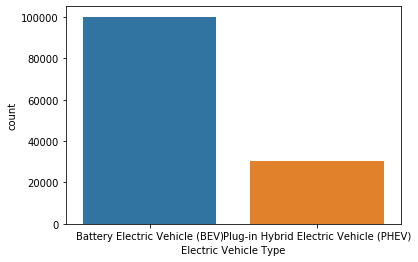

In [56]:
#Ans
import pandas as pd
df = pd.read_csv('https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD')
df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']!='Clean Alternative Fuel Vehicle Eligible']

df_t = df[df['Make']=='TESLA']
df_t[df_t['City']=='Bothell']
df[df['Electric Range']>100]

df_e = df[df['Electric Range']>100]
df_e[df_e['Model Year']>2015]

import seaborn as sns
import matplotlib.pyplot as plt
 
# count plot on single categorical variable
sns.countplot(x ='Electric Vehicle Type', data = df)
# Show the plot
plt.show()

Question 10 -
Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase or
paragraph, and return their respective count as a dictionary.
Note -
1. Write code comments wherever required for code
2. You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.

In [57]:
import re

def count_pos(phrase):
    
    counts = {'verbs': 0, 'nouns': 0, 'pronouns': 0, 'adjectives': 0}

    phrase = phrase.lower()

    words = re.findall(r'\b\w+\b', phrase)

    for word in words:
        if re.match(r'\b(?:am|is|are|was|were|be|being|been|' \
                    r'have|has|had|do|does|did|shall|will|should|' \
                    r'would|may|might|must|can|could)\b', word):

            counts['verbs'] += 1
        elif re.match(r'\b(?:i|me|my|mine|we|us|our|ours|' \
                      r'you|your|yours|he|him|his|she|her|hers|' \
                      r'it|its|they|them|their|theirs)\b', word):
    
            counts['pronouns'] += 1
        elif re.match(r'\b(?:a|an|the|this|that|these|those|my|' \
                      r'your|his|her|its|our|their|one|two|three|' \
                      r'first|second|third|some|many|much|few|' \
                      r'most|several|all|any|no)\b', word):
            
            counts['adjectives'] += 1
        else:
            counts['nouns'] += 1

    return counts
sample_phrase = "This is an sample statement."
print(count_pos(sample_phrase))

{'verbs': 1, 'nouns': 2, 'pronouns': 0, 'adjectives': 2}
